In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import utils
import gpfunctions as gp
import lstm_model
import benchmarkfunctions as bm
import skopt


In [3]:
import matplotlib.pylab as pylab
params = {
    'axes.labelsize': 'xx-large',
    'xtick.labelsize':'xx-large',
    'ytick.labelsize':'xx-large'
}
pylab.rcParams.update(params)

In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
LOSS_FUNCS = ['MIN']
BASELINES = ['SKOPT', 'RANDOM']
DIMS = [2,3,4,6]
N_STEPS = 20

In [12]:
FUNCTIONS = {
#     '2d': bm.parabolasin,
#     '2d_tf': bm.parabolasin_tf,
#     '3d': bm.hartmann3,
#     '3d_tf': bm.hartmann3_tf,
#     '4d': bm.styblinski4,
#     '4d_tf': bm.styblinski4_tf,
#     '6d': bm.hartmann6,
#     '6d_tf': bm.hartmann6_tf,
    'name': {
        2: 'Parabola-Sin',
        3: 'Hartmann3',
        4: 'Styblinski–Tang',
        6: 'Hartmann6'
    }
}

In [ ]:
# def get_y_from_skopt(dim, n_start_random=10, runs=10):
#     obj_func =  lambda x : float(FUNCTIONS['%dd'%(dim)](x))
#     data = []
#     for i in range(runs):
#         res = skopt.gp_minimize(obj_func, [(-1.0, 1.0)]*dim, n_calls=N_STEPS+1, x0=[-1]*dim)
#         data.append(res.func_vals)
#     return np.mean(np.array(data),axis=0)

# def get_y_from_random(dim, steps, runs=10):
#     data = []
#     for i in range(runs):
#         x = np.random.uniform(-1,1,(dim,steps))
#         x[:, 0] = [-1]*dim
#         y = np.apply_along_axis(FUNCTIONS['%dd'%(dim)], 0, x)
#         data.append(y.T)
#     return np.mean(np.array(data),axis=0)

In [ ]:
# def get_y_from_lstm(kernel, dim, loss, func, n_steps=20, debug=False):
    
#     model = utils.get_trained_model(dim=dim, kernel=kernel, loss=loss)    
#     starting_point = utils.loadConfig()['experiments']['%dD'%dim]['hyperparameters']['starting_point'][0]

#     model_params = lstm_model.load_model_params(model, debug=False)

#     res = None
#     with tf.Session() as sess:

#         lstm_params = {
#             'dim' : model_params['dim'],
#             'n_hidden': model_params['n_hidden'],
#             'forget_bias': model_params['forget_bias'],
#             'scope': model_params['scope']
#         }
#         cell, weights = lstm_model.get_lstm_weights(**lstm_params)
        
#         saver = tf.train.Saver()
#         saver.restore(sess, model_params['model_path'])

#         benchmark_samples_params = {
#             'f': func,
#             'cell': cell,
#             'weights': weights,
#             'dim': model_params['dim'],
#             'n_hidden': model_params['n_hidden'],
#             'n_steps': model_params['n_steps'],
#             'scope': model_params['scope'],
#             'batch_size': 1
#         }
        
#         samples_benchmark_x, samples_benchmark_y, x_0 = lstm_model.apply_lstm_model(**benchmark_samples_params)
    
#         feed_dict = {
#             x_0: np.array(starting_point).reshape(1,-1)
#         }
#         sample_y, sample_x = sess.run([samples_benchmark_y, samples_benchmark_x], feed_dict=feed_dict)
#         sample_y = np.array(sample_y).reshape(-1,1).T
#         sample_x = np.array(sample_x).reshape(-1,1, model_params['dim']).transpose((1,0,2)).reshape(-1,model_params['dim'])
#         return sample_y.T

In [ ]:
# def plot_for_dim(dim):
#     data = {}
#     data['SKOPT']  = utils.min_up_to_k(get_y_from_skopt(dim))
#     data['RANDOM'] = utils.min_up_to_k(get_y_from_random(dim, steps = N_STEPS+1))
    
#     for k in BASELINES:
#         label = k
#         if k is 'SKOPT':
#             label = 'SKOPT-GP'
#         plt.plot(data[k], label=label)
        
#     for kernel in ['rbf', 'matern32']:
#         for loss in LOSS_FUNCS:
#             y = get_y_from_lstm(kernel, dim, loss, FUNCTIONS['%dd_tf'%(dim)])
#             y = utils.min_up_to_k(y)
#             plt.plot(y, label='LSTM-%s-%s'%(loss, kernel.upper()))
        
#     xticks = range(0,N_STEPS+1,2)
#     plt.ylabel('Min Found')
#     plt.xlabel('Evaluation Step')
#     plt.xticks(xticks)
#     plt.ylim(-1)
#     plt.title('%dD : %s' % (dim, FUNCTIONS['name'][dim]) )
#     plt.plot()

In [79]:
import imp
imp.reload(utils)

<module 'utils' from '/Users/heytitle/projects/neural-network-project/utils.py'>

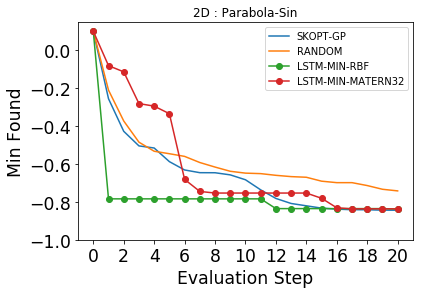

In [95]:
def plot_for_dim(dim, legend=False):
    data = {}
    
    data['SKOPT'],  data['SKOPT_STD']  = utils.average_min_found_values_across_rows(load_data(dim, 'skopt-gp'))
    
    data['RANDOM'], data['RANDOM_STD'] = utils.average_min_found_values_across_rows(load_data(dim, 'random'))
    
    x_range = range(0,len(data['SKOPT']))
    for k in BASELINES:
        label = k
        if k is 'SKOPT':
            label = 'SKOPT-GP'
#         print(k)
#         print(data['%s_STD'%k])
        plt.plot(x_range, data[k],  label=label)
        
    for kernel in ['rbf', 'matern32']:
        for loss in ['MIN']:
            y, std_y = utils.average_min_found_values_across_rows(load_data(dim, 'lstm-%s-%s' %(loss, kernel)))
#             print(kernel)
#             print(std_y)
            plt.plot(x_range, y, label='LSTM-%s-%s'%(loss, kernel.upper()), marker='o')
    if legend:
        plt.legend()
    xticks = range(0,N_STEPS+1,2)
    plt.ylabel('Min Found')
    plt.xlabel('Evaluation Step')
    plt.xticks(xticks)
    plt.ylim(-1)
    plt.title('%dD : %s' % (dim, FUNCTIONS['name'][dim]) )
    plt.plot()
plot_for_dim(2, legend=True)

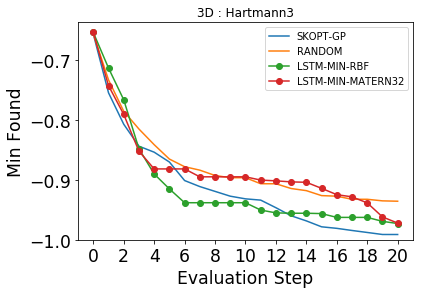

In [64]:
plot_for_dim(3, legend=True)

SKOPT
[ 0.04706331  0.2092797   0.15618992  0.12067433  0.10823237  0.10193729
  0.08741737  0.08188104  0.08004627  0.07689328  0.07621484  0.07620787
  0.07565777  0.06908197  0.06904782  0.06644403  0.06431045  0.0651067
  0.06629268  0.06572123  0.06351285]
RANDOM
[ 0.04706331  0.22874578  0.12369009  0.1000545   0.09211666  0.08892037
  0.07710809  0.07384319  0.06704278  0.0632451   0.06157863  0.05734937
  0.05529401  0.05387197  0.05165959  0.05135472  0.05148839  0.05112707
  0.05019639  0.04962579  0.04939096]
rbf
[ 0.04706316  0.02759716  0.01380196  0.01380196  0.0075398   0.0075398
  0.0075398   0.0075398   0.0075398   0.0075398   0.0075398   0.0075398
  0.0075398   0.0075398   0.0075398   0.0075398   0.0075398   0.0075398
  0.0075398   0.0075398   0.0075398 ]
matern32
[ 0.04706316  0.02130348  0.02130348  0.00338751  0.00338751  0.00338751
  0.00803981  0.00639364  0.00639364  0.02151523  0.01220316  0.01220316
  0.01220316  0.01220316  0.01220316  0.01220316  0.01220316 

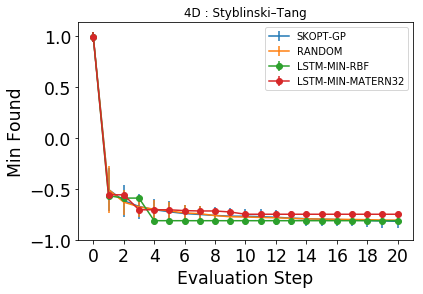

In [89]:
plot_for_dim(4, legend=True)

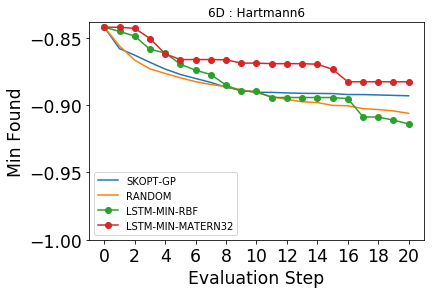

In [100]:
plot_for_dim(6, legend=True)

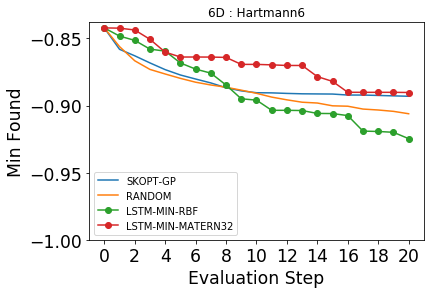

In [101]:
plot_for_dim(6, legend=True)

Average over 10 functions
- 5 permutation of x
- 2 different translations of x


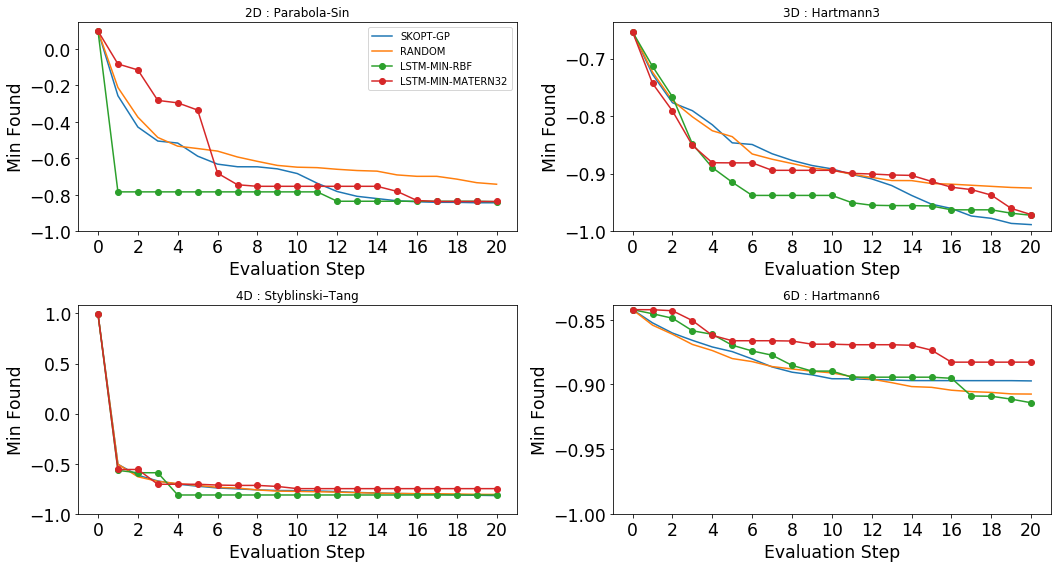

In [97]:
count = 0
plt.figure(figsize=(15,4*2))
for d in [2,3,4,6]:
    plt.subplot(2,2,count + 1 )

    plot_for_dim(d)
    if d is 2:
        plt.legend()
    count = count + 1
plt.tight_layout()
print('Average over 10 functions')
print('- 5 permutation of x')
print('- 2 different translations of x')

In [ ]:
np.random.seed(100)
np.random.uniform(-1,1, (10,2))

In [ ]:
print("sdf %s" %([1,2]))

In [ ]:
gp_2d_y = np.load('./benchmark-result/2d-skopt-gp.npy')
print(gp_2d_y.shape)

In [34]:
def load_data(dim, optimizer):
    y = np.load('./benchmark-result/%dd-%s.npy' % (dim, optimizer) )
    
    return y
    
rbf_2d = load_data(2, 'lstm-MIN-rbf')

In [35]:
rbf_2d[0]

array([ 0.07337213, -0.8089447 , -0.73998082, -0.00878769,  0.07171726,
        0.18869591, -0.2439357 , -0.50999033, -0.29651177, -0.33990437,
       -0.69275475, -0.88576376, -0.89214712, -0.91017419, -0.84018087,
       -0.73215061, -0.62520939, -0.65716416, -0.80275202, -0.88388097,
       -0.91770852])

In [36]:
rbf_2d[1]

array([ 0.07337213, -0.8089447 , -0.73998082, -0.00878769,  0.07171726,
        0.18869591, -0.2439357 , -0.50999033, -0.29651177, -0.33990437,
       -0.69275475, -0.88576376, -0.89214712, -0.91017419, -0.84018087,
       -0.73215061, -0.62520939, -0.65716416, -0.80275202, -0.88388097,
       -0.91770852])

In [72]:
rbf_4d = load_data(4, 'lstm-MIN-rbf')

In [73]:
rbf_4d[:,0]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.0059731 ,  1.0059731 ,  1.0059731 ,  1.0059731 ,  1.0059731 ,
        1.0059731 ,  1.0059731 ,  1.0059731 ,  1.0059731 ,  1.0059731 ,
        1.00908875,  1.00908875,  1.00908875,  1.00908875,  1.00908875,
        1.00908875,  1.00908875,  1.00908875,  1.00908875,  1.00908875,
        0.92941284,  0.92941284,  0.92941284,  0.92941284,  0.92941284,
        0.92941284,  0.92941284,  0.92941284,  0.92941284,  0.92941284,
        1.01573467,  1.01573467,  1.01573467,  1.01573467,  1.01573467,
        1.01573467,  1.01573467,  1.01573467,  1.01573467,  1.01573467,
        1.08476901,  1.08476901,  1.08476901,  1.08476901,  1.08476901,
        1.08476901,  1.08476901,  1.08476901,  1.08476901,  1.08476901,
        0.95557797,  0.95557797,  0.95557797,  0.95557797,  0.95557797,
        0.95557797,  0.95557797,  0.95557797,  0.95557797,  0.95

In [ ]:
load_data(dim, 'skopt-gp').shape

In [56]:
# NOTE: This code is not working
def plot_for_fun(fun, fun_tf, n_runs, dim):
    data = {}
    for i in range(n_runs):
        print("Run ",i+1,"/",n_runs)
        # Shift function = Random Starting point
        x0 = np.random.normal(size=dim, scale=0.2)
        # Flip function
        flip = 1#np.random.choice([-1.0,1.0])
        # Shift up and down
        y0 = np.random.normal(size=1, scale=0.2)
        
        if i==0:
            data['SKOPT']  = [utils.min_up_to_k(get_y_from_skopt(dim, func=lambda x : float(y0+fun(flip*x+x0))))]
            data['RANDOM'] = [utils.min_up_to_k(get_y_from_random(dim, steps = N_STEPS+1,
                                                                  func= lambda x : float(y0+fun(flip*x+x0))))]
            for loss in LOSS_FUNCS:
                data[loss] = [utils.min_up_to_k(get_y_from_lstm('rbf', dim, loss, 
                                                                lambda x : y0+fun_tf(flip*x+x0)))]
        else:
            data['SKOPT']  += [utils.min_up_to_k(get_y_from_skopt(dim, func=lambda x : float(y0+fun(flip*x+x0))))]
            data['RANDOM'] += [utils.min_up_to_k(get_y_from_random(dim, steps = N_STEPS+1,
                                                                  func= lambda x : float(y0+fun(flip*x+x0))))]
            for loss in LOSS_FUNCS:
                data[loss] += [utils.min_up_to_k(get_y_from_lstm('rbf', dim, loss, 
                                                                lambda x : y0+fun_tf(flip*x+x0)))]
        
    return data
        
    
    
def plot_results(data, dim=2):
    for k in data.keys():
        plt.plot(np.mean(np.array(data[k]),axis=0), label=k)
        
    xticks = range(0,N_STEPS+1,2)
    plt.ylabel('Min Found')
    plt.xlabel('Evaluation Step')
    plt.xticks(xticks)
    plt.ylim(-1)
    plt.title('%dD' % dim)
    plt.legend()
    plt.plot()

In [ ]:
count = 0
plt.figure(figsize=(15,4*2))
for fun, fun_tf, dim in zip([bm.parabolasin, bm.hartmann3, bm.styblinski4, bm.hartmann6],
                           [bm.parabolasin_tf, bm.hartmann3_tf, bm.styblinski4_tf, bm.hartmann6_tf],[2,3,4,6]):
    print(fun)
    plt.subplot(2,2,count + 1 )
    data = plot_for_fun(fun, fun_tf , 10, dim)
    plot_results(data, dim)
    count = count + 1
plt.tight_layout()


In [ ]:
import imp
imp.reload(benchmarkfunctions)

In [ ]:
y = load_data(2, 'skopt-gp')

In [ ]:
list(y)

In [9]:
print('sdfsdf ' + str((1,2,3)))

sdfsdf (1, 2, 3)
